# Import Library

In [63]:
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model & evaluasi
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Bayesian Optimization
import optuna

# Simpan model
import joblib

# Setting
sns.set(style="whitegrid")

In [64]:
df = pd.read_csv('DATA-RUMAH.csv')

df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


Data Cleaning

In [66]:
# Drop kolom yang tidak relevan
df = df.drop(columns=['NO', 'NAMA RUMAH'])

df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [67]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [68]:
df.isnull().sum()

HARGA    0
LB       0
LT       0
KT       0
KM       0
GRS      0
dtype: int64

# EDA

## Statistik Deskriptif

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HARGA,1010.0,7.628987e+09,7.340946e+09,430000000.0,3.262500e+09,5.000000e+09,9.000000e+09,6.500000e+10
LB,1010.0,2.765396e+02,1.778646e+02,40.0,1.500000e+02,2.165000e+02,3.500000e+02,1.126000e+03
LT,1010.0,2.374327e+02,1.799576e+02,25.0,1.300000e+02,1.650000e+02,2.900000e+02,1.400000e+03
KT,1010.0,4.668317e+00,1.572776e+00,2.0,4.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
KM,1010.0,3.607921e+00,1.420066e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
GRS,1010.0,1.920792e+00,1.510998e+00,0.0,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01


## Distribusi Target Harga

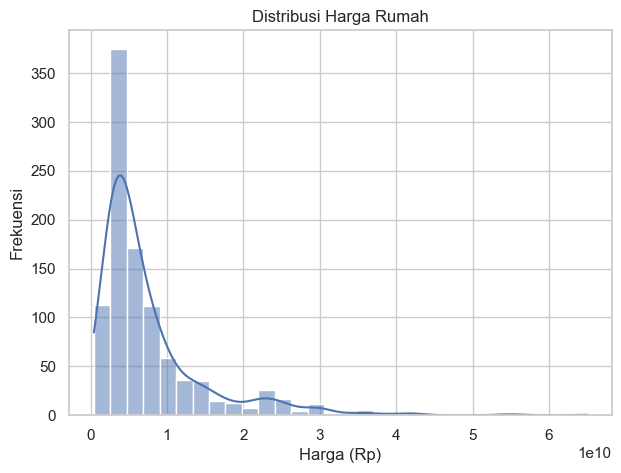

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(df['HARGA'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga (Rp)')
plt.ylabel('Frekuensi')
plt.show()

## Boxplot Harga (Outlier Check)

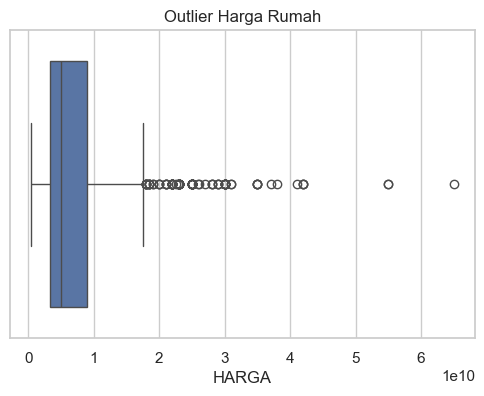

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["HARGA"])
plt.title("Outlier Harga Rumah")
plt.show()

## Distribusi Fitur Numerik

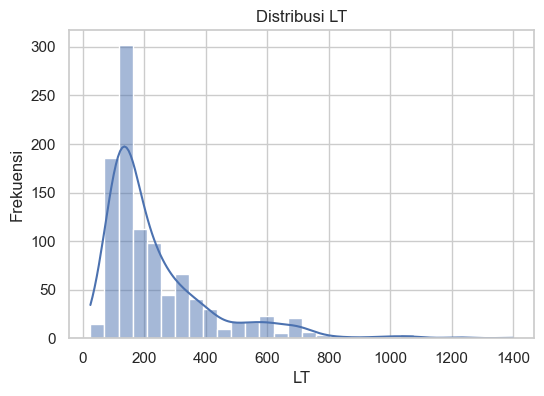

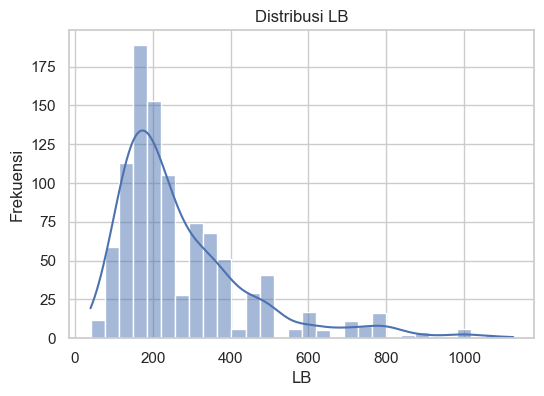

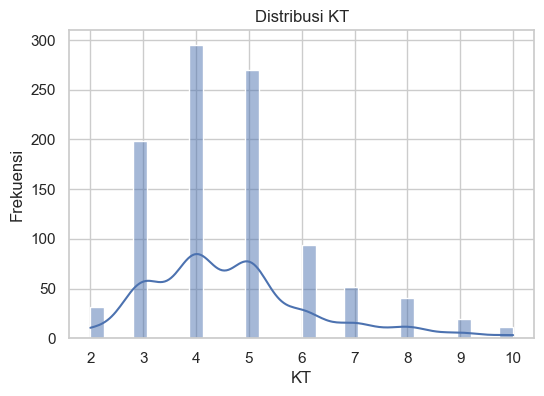

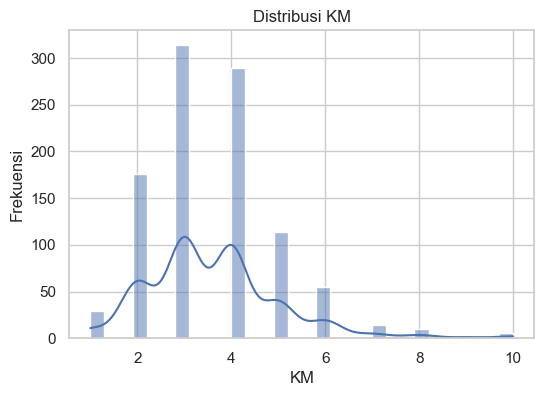

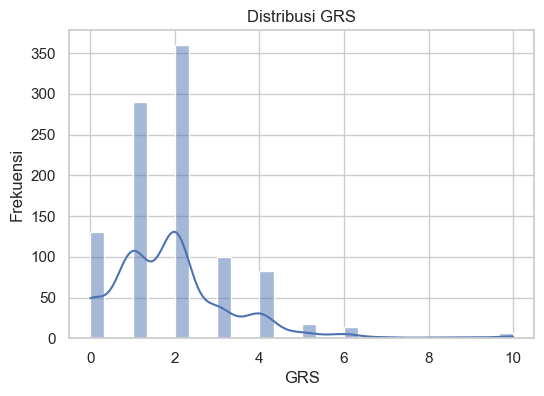

In [10]:
num_cols = ["LT", "LB", "KT", "KM", "GRS"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

## Korelasi Antar Variabel Numerik

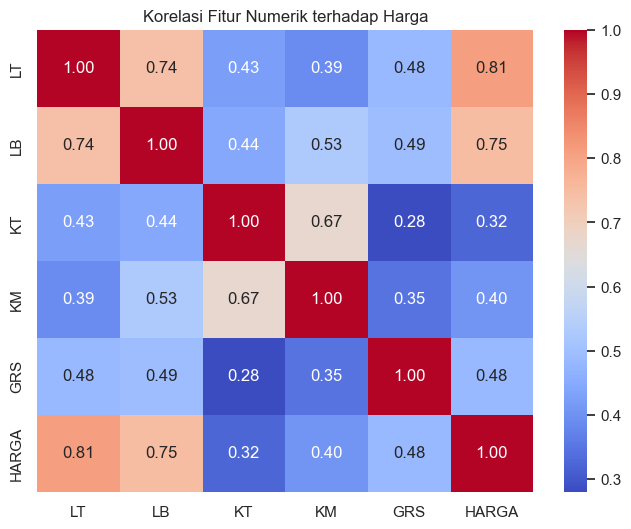

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[num_cols + ["HARGA"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Korelasi Fitur Numerik terhadap Harga")
plt.show()

## Analisis Harga per Jumlah Kamar

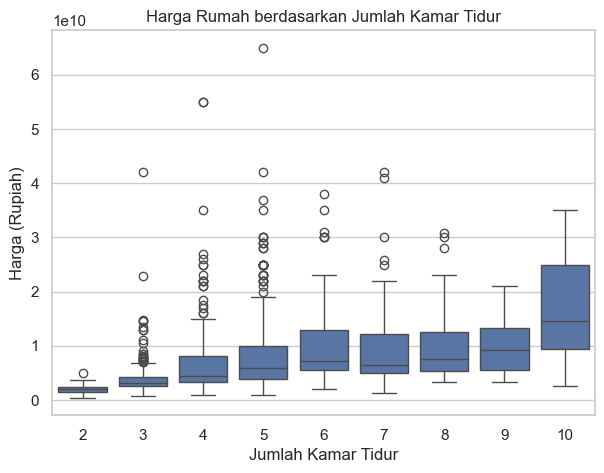

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(x="KT", y="HARGA", data=df)
plt.title("Harga Rumah berdasarkan Jumlah Kamar Tidur")
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("Harga (Rupiah)")
plt.show()

## EDA Kategori Harga

In [13]:
df["KATEGORI_HARGA"] = pd.qcut(
    df["HARGA"],
    q=3,
    labels=["Murah", "Sedang", "Mahal"]
)

### Distribusi Kategori

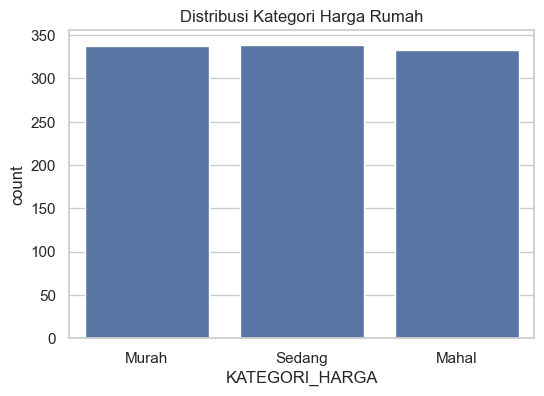

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="KATEGORI_HARGA", data=df)
plt.title("Distribusi Kategori Harga Rumah")
plt.show()

### Boxplot per Kategori

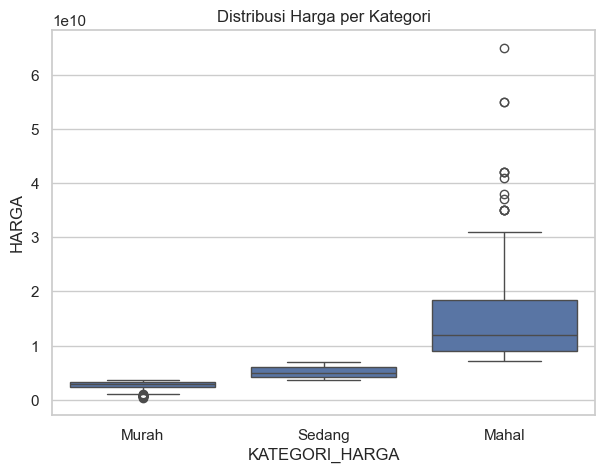

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x="KATEGORI_HARGA", y="HARGA", data=df)
plt.title("Distribusi Harga per Kategori")
plt.show()

In [16]:
df_model = df.drop(columns=['KATEGORI_HARGA'])

## Feature Engineering

In [17]:
df["HARGA_LOG"] = np.log1p(df["HARGA"])

# rasio
df["RASIO_LB_LT"] = df["LB"] / (df["LT"] + 1)

X = df[["LT", "LB", "KT", "KM", "GRS", "RASIO_LB_LT"]]
y = df["HARGA_LOG"]

# Splitting Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessor

In [19]:
num_features = X.columns.tolist()

preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features)
])

# Baseline XGBoost + CV

In [20]:
baseline_model = Pipeline([
    ("prep", preprocessor),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        tree_method="hist",
        random_state=42
    ))
])

In [21]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

baseline_rmse = -cross_val_score(
    baseline_model,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=cv
).mean()

baseline_rmse

np.float64(0.3271653818942929)

# BAYESIAN OPTIMIZATION (OPTUNA - TPE) + CV


In [52]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 10)
    }

    model = Pipeline([
        ("prep", preprocessor),
        ("xgb", XGBRegressor(
            objective="reg:squarederror",
            tree_method="hist",
            random_state=42,
            **params
        ))
    ])

    rmse = -cross_val_score(
        model,
        X_train,
        y_train,
        scoring="neg_root_mean_squared_error",
        cv=cv
    ).mean()

    return rmse

In [53]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

study.best_value

[I 2026-01-29 05:51:36,982] A new study created in memory with name: no-name-ea172f22-0b25-4a45-b3d3-ea8a59f30ad8
[I 2026-01-29 05:51:39,399] Trial 0 finished with value: 0.346784844301769 and parameters: {'n_estimators': 336, 'max_depth': 4, 'learning_rate': 0.01692958639765141, 'subsample': 0.792604409735519, 'colsample_bytree': 0.9682233231444957, 'min_child_weight': 5, 'gamma': 1.6427334673194887, 'reg_alpha': 0.18298710853032973, 'reg_lambda': 9.701260904783199}. Best is trial 0 with value: 0.346784844301769.
[I 2026-01-29 05:51:40,527] Trial 1 finished with value: 0.3635446430086571 and parameters: {'n_estimators': 401, 'max_depth': 4, 'learning_rate': 0.0378642055959648, 'subsample': 0.6790109305624247, 'colsample_bytree': 0.625324646233339, 'min_child_weight': 4, 'gamma': 4.007459459429966, 'reg_alpha': 0.2644458144518419, 'reg_lambda': 6.701450187822251}. Best is trial 0 with value: 0.346784844301769.
[I 2026-01-29 05:51:41,474] Trial 2 finished with value: 0.3754854897766666 

0.32036737885826316

In [54]:
print("Best RMSE (CV):", study.best_value)
print("Best Hyperparameters:")
for k, v in study.best_params.items():
    print(f"- {k}: {v}")

Best RMSE (CV): 0.32036737885826316
Best Hyperparameters:
- n_estimators: 338
- max_depth: 7
- learning_rate: 0.044972657688409974
- subsample: 0.7923837190981531
- colsample_bytree: 0.9710504560745582
- min_child_weight: 4
- gamma: 0.025750096733310496
- reg_alpha: 0.28551056874751024
- reg_lambda: 9.972335397362762


# Train Final Model

In [55]:
final_model = Pipeline([
    ("prep", preprocessor),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        tree_method="hist",
        random_state=42,
        **study.best_params
    ))
])

final_model.fit(X_train, y_train)
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['LT', 'LB', 'KT', 'KM',
                                                   'GRS', 'RASIO_LB_LT'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=N...ow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

# Evaluasi

## Prediksi (Log -> Rupiah)

In [56]:
# Target asli (rupiah)
y_train_rp = np.expm1(y_train)
y_test_rp  = np.expm1(y_test)

# Prediksi baseline
y_train_pred_base_log = baseline_model.predict(X_train)
y_test_pred_base_log  = baseline_model.predict(X_test)

y_train_pred_base = np.expm1(y_train_pred_base_log)
y_test_pred_base  = np.expm1(y_test_pred_base_log)

# Prediksi XGBoost + BO
y_train_pred_bo_log = final_model.predict(X_train)
y_test_pred_bo_log  = final_model.predict(X_test)

y_train_pred_bo = np.expm1(y_train_pred_bo_log)
y_test_pred_bo  = np.expm1(y_test_pred_bo_log)

## Metrik Evaluasi

In [57]:
def evaluate_all(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

In [58]:
# EVALUASI BASELINE
rmse_tr_b, mae_tr_b, r2_tr_b = evaluate_all(y_train_rp, y_train_pred_base)
rmse_te_b, mae_te_b, r2_te_b = evaluate_all(y_test_rp,  y_test_pred_base)

# EVALUASI XGBOOST + BO
rmse_tr_o, mae_tr_o, r2_tr_o = evaluate_all(y_train_rp, y_train_pred_bo)
rmse_te_o, mae_te_o, r2_te_o = evaluate_all(y_test_rp,  y_test_pred_bo)

## Tabel Evaluasi

In [59]:
hasil_train_test = pd.DataFrame({
    "Model": [
        "Baseline - Train",
        "Baseline - Test",
        "XGBoost + BO - Train",
        "XGBoost + BO - Test"
    ],
    "RMSE (Rp)": [
        rmse_tr_b, rmse_te_b,
        rmse_tr_o, rmse_te_o
    ],
    "MAE (Rp)": [
        mae_tr_b, mae_te_b,
        mae_tr_o, mae_te_o
    ],
    "R²": [
        r2_tr_b, r2_te_b,
        r2_tr_o, r2_te_o
    ]
})

hasil_train_test.style.format({
    "RMSE (Rp)": "{:,.2f}",
    "MAE (Rp)": "{:,.2f}",
    "R²": "{:.4f}"
})

,Model,RMSE (Rp),MAE (Rp),R²
0,Baseline - Train,"516,913,229.13","220,081,287.06",0.9952
1,Baseline - Test,"3,222,998,461.16","1,725,016,709.76",0.7775
2,XGBoost + BO - Train,"2,477,063,433.97","986,309,376.45",0.8897
3,XGBoost + BO - Test,"2,973,281,782.05","1,702,915,097.39",0.8106


# Analisis Overfitting

In [60]:
print("=== OVERFITTING CHECK ===")
print(f"Baseline RMSE Train : {rmse_tr_b:,.0f}")
print(f"Baseline RMSE Test  : {rmse_te_b:,.0f}")
print(f"Gap Baseline        : {rmse_te_b - rmse_tr_b:,.0f}")

print("\nXGBoost + BO RMSE Train : {:,.0f}".format(rmse_tr_o))
print("XGBoost + BO RMSE Test  : {:,.0f}".format(rmse_te_o))
print("Gap BO                 : {:,.0f}".format(rmse_te_o - rmse_tr_o))

=== OVERFITTING CHECK ===
Baseline RMSE Train : 516,913,229
Baseline RMSE Test  : 3,222,998,461
Gap Baseline        : 2,706,085,232

XGBoost + BO RMSE Train : 2,477,063,434
XGBoost + BO RMSE Test  : 2,973,281,782
Gap BO                 : 496,218,348


# Visualisasi Akhir

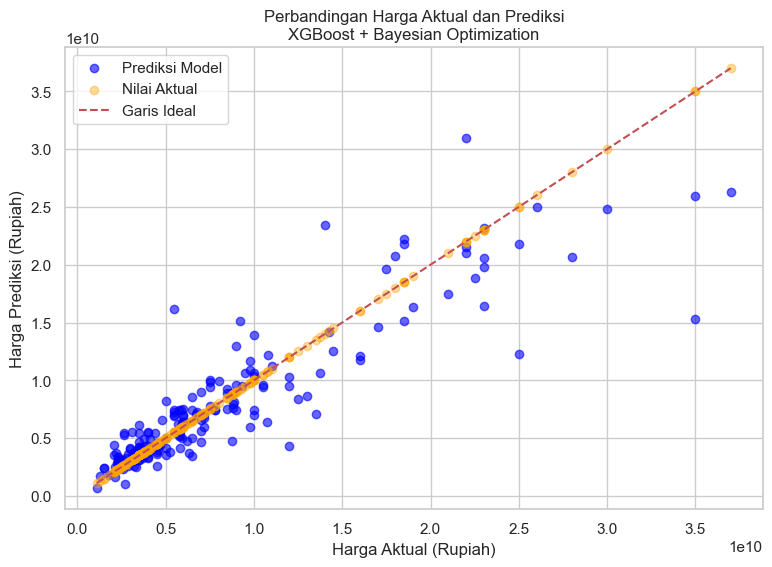

In [61]:
plt.figure(figsize=(9,6))

plt.scatter(
    y_test_rp,
    y_test_pred_bo,
    alpha=0.6,
    color='blue',
    label='Prediksi Model'
)

plt.scatter(
    y_test_rp,
    y_test_rp,
    alpha=0.4,
    color='orange',
    label='Nilai Aktual'
)

plt.plot(
    [y_test_rp.min(), y_test_rp.max()],
    [y_test_rp.min(), y_test_rp.max()],
    'r--',
    label='Garis Ideal'
)

plt.xlabel('Harga Aktual (Rupiah)')
plt.ylabel('Harga Prediksi (Rupiah)')
plt.title('Perbandingan Harga Aktual dan Prediksi\nXGBoost + Bayesian Optimization')
plt.legend()
plt.grid(True)
plt.show()

# Save Model

In [62]:
joblib.dump(final_model, "xgb_bo2.pkl")
joblib.dump(preprocessor, "preprocess_xgb_bo2.pkl")

print("Model dan Preprocessor berhasil dibuat")

Model dan Preprocessor berhasil dibuat
